In [2]:
import matplotlib.pyplot as plt
import re 
import ast


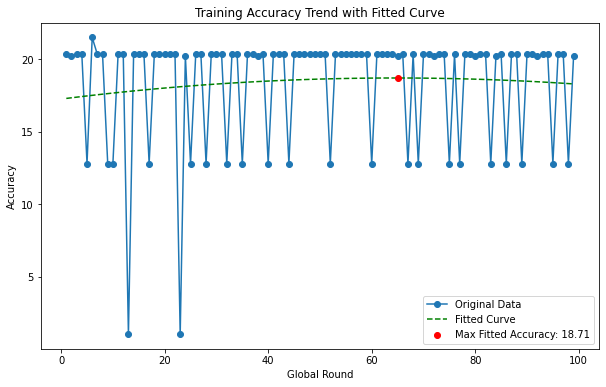

In [484]:
import numpy as np
import ast
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Read the data from the file
file_path = "./accuracy_trend.txt"
accuracy_values = []

with open(file_path, "r") as file:
    lines = file.readlines()

for line in lines:
    data = ast.literal_eval(line)
    accuracy = data['Accuracy']
    accuracy_values.append(accuracy)

# Convert epochs to a numpy array
epochs = range(1, len(accuracy_values) + 1)
epochs_arr = np.array(epochs)

# Define a function for polynomial fitting
def polynomial(x, a, b, c):
    return a * x**2 + b * x + c

# Perform curve fitting
popt, _ = curve_fit(polynomial, epochs_arr, accuracy_values)

# Generate y values for the fitted curve
fitted_curve = polynomial(epochs_arr, *popt)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the original data and the fitted curve
plt.plot(epochs, accuracy_values, marker='o', linestyle='-', label='Original Data')
plt.plot(epochs, fitted_curve, color='green', linestyle='--', label='Fitted Curve')

# Find the maximum point of the fitted curve
max_index = np.argmax(fitted_curve)
max_accuracy_fitted = fitted_curve[max_index]
max_global_round_fitted = epochs[max_index]

# Mark the maximum point of the fitted curve
plt.scatter(max_global_round_fitted, max_accuracy_fitted, color='red', label=f'Max Fitted Accuracy: {max_accuracy_fitted:.2f}', zorder=5)

plt.xlabel("Global Round")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Trend with Fitted Curve")
plt.legend()
plt.show()

In [485]:
################################################################################
#######################plot the distance for each clients, distance_values.txt.txt file
################################################################################
import matplotlib.pyplot as plt
import numpy as np

# Read data from the file
file_path = "./distance_values.txt"
with open(file_path, "r") as file:
    data = file.readlines()

# Parse the data and extract round numbers, client IDs, and distances
rounds = []
clients = []
distances = []
for line in data:
    parts = line.strip().split(", ")
    round_number = int(parts[0].split(": ")[1])
    client_id = int(parts[1].split(": ")[1])
    distance = float(parts[2].split(": ")[1])
    rounds.append(round_number)
    clients.append(client_id)
    distances.append(distance)

max_client_num = (max(clients))

# Define a color map
cmap = plt.get_cmap('tab20')

# Plot the distances against rounds with different markers and colors for each client
plt.figure(figsize=(10, 6))
for client_id in range(max_client_num+1):  # Assuming you have 20 clients
    x = [rounds[i] for i in range(len(rounds)) if clients[i] == client_id]
    y = [distances[i] for i in range(len(distances)) if clients[i] == client_id]
    color = cmap(client_id % 20)  # Use modulus to ensure distinct colors for each client
    plt.scatter(x, y, label=f'Client {client_id}', marker='o', color=color)

# Create separate legends for two categories
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), title='Clients', markerscale=1.5)

plt.xlabel('Global Round')
plt.ylabel('Distance')
plt.title('Distance Trend Over Rounds')
plt.grid(True)
plt.show()

ValueError: invalid literal for int() with base 10: '1.48756742477417'

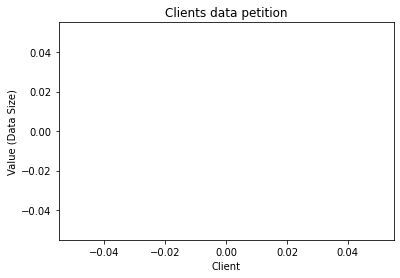

In [486]:
### plot the client data distribution
file_path = "./client_data_size.txt"

clients = []
data_sizes = []

with open (file_path, 'r') as file:
    lines = file.readlines()[:10]


for line in lines:
    parts = line.split(", ")
    client = int(parts[0].split(": ")[1])
    data_size = int(parts[1].split(": ")[1])
    clients.append(client)
    data_sizes.append(data_size)


plt.bar(clients,data_sizes)
plt.xlabel("Client")
plt.ylabel("Value (Data Size)")
plt.title("Clients data petition")

for i,value in enumerate(data_sizes):
    plt.text(clients[i],value,str(value),ha='center',va='bottom')

plt.show()





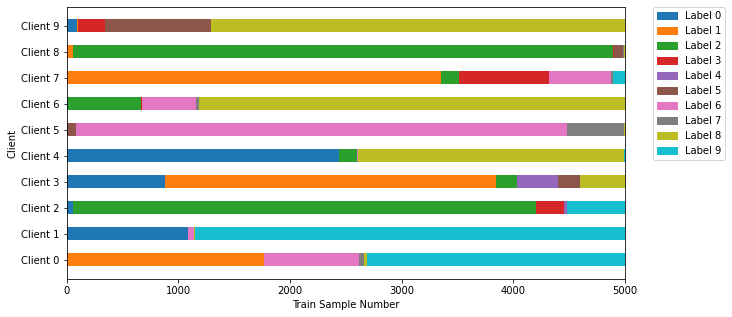

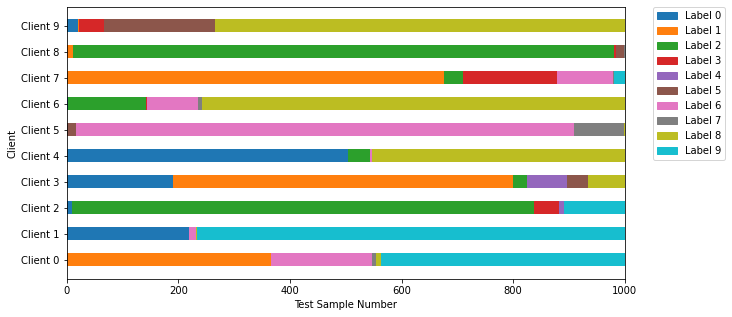

In [487]:
#========plot each client data distributuion,iid,non-iid(dirichlet)============================

import matplotlib.pyplot as plt

file_path = "./non-iid_data_distribution.txt"

# Initialize dictionaries to store training and testing data for each client
train_data = {}
test_data = {}

# Read the file line by line
with open(file_path, 'r') as file:
    for line in file:
        # Split the line into words
        words = line.split()

        # Extract information from the line
        client_id = int(words[1][:-1])  # Extract the client ID
        data_type = words[2].lower()    # Extract whether it's training or testing data
        label = int(words[4][:-1])       # Extract the label
        samples = int(words[-1])        # Extract the number of samples

        # Update the corresponding dictionary
        if data_type == 'train':
            if client_id not in train_data:
                train_data[client_id] = {}
            train_data[client_id][label] = samples
        elif data_type == 'test':
            if client_id not in test_data:
                test_data[client_id] = {}
            test_data[client_id][label] = samples

# Combine training and testing data for plotting
data_to_plot_train = {**train_data}
data_to_plot_test = {**test_data}

# Plot for training data
fig, ax_train = plt.subplots(figsize=(10, 5))
legend_labels_train = set()  # Track unique labels for custom legend

for i, client in enumerate(data_to_plot_train):
    for j, label in enumerate(data_to_plot_train[client]):
        ax_train.barh(i, data_to_plot_train[client][label], left=sum([data_to_plot_train[client][l] for l in list(data_to_plot_train[client])[:j]]), height=0.5, color=f'C{j}')
        legend_labels_train.add(label)

ax_train.set_yticks(range(len(data_to_plot_train)))
ax_train.set_yticklabels([f'Client {c}' for c in data_to_plot_train.keys()])
ax_train.set_xlabel('Train Sample Number')
ax_train.set_ylabel('Client')

# Create a custom legend for training data
legend_handles_train = [plt.Rectangle((0, 0), 1, 1, color=f'C{j}', label=f'Label {label}') for j, label in enumerate(legend_labels_train)]
ax_train.legend(handles=legend_handles_train, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Plot for testing data
fig, ax_test = plt.subplots(figsize=(10, 5))
legend_labels_test = set()  # Track unique labels for custom legend

for i, client in enumerate(data_to_plot_test):
    for j, label in enumerate(data_to_plot_test[client]):
        ax_test.barh(i, data_to_plot_test[client][label], left=sum([data_to_plot_test[client][l] for l in list(data_to_plot_test[client])[:j]]), height=0.5, color=f'C{j}')
        legend_labels_test.add(label)

ax_test.set_yticks(range(len(data_to_plot_test)))
ax_test.set_yticklabels([f'Client {c}' for c in data_to_plot_test.keys()])
ax_test.set_xlabel('Test Sample Number')
ax_test.set_ylabel('Client')

# Create a custom legend for testing data
legend_handles_test = [plt.Rectangle((0, 0), 1, 1, color=f'C{j}', label=f'Label {label}') for j, label in enumerate(legend_labels_test)]
ax_test.legend(handles=legend_handles_test, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


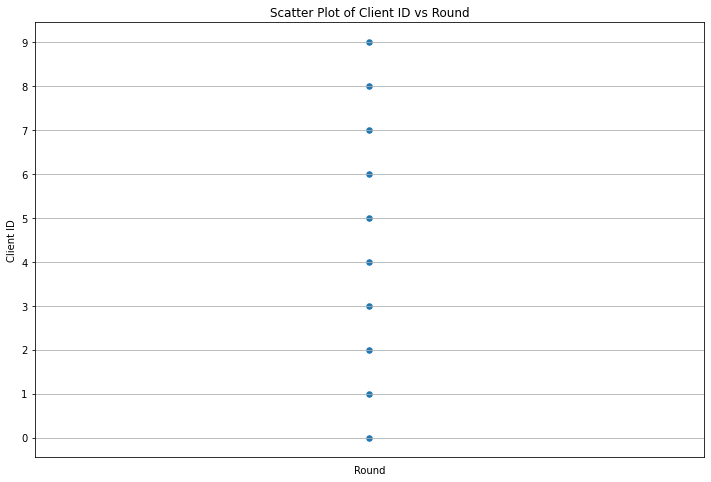

In [498]:
# show the client selection distribution

import matplotlib.pyplot as plt

# Read data from the file
file_path = "./client_selection_log.txt"
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the data
data = [list(map(int, line.strip()[1:-1].split(','))) for line in lines]

# Create a scatter plot
plt.figure(figsize=(12, 8))

for round_num, client_ids in enumerate(data):
    plt.scatter([round_num + 1] * len(client_ids), client_ids, marker='o', s=30)

plt.xlabel('Round')
plt.ylabel('Client ID')
plt.title('Scatter Plot of Client ID vs Round')

# Set x-axis ticks starting from 0 with a step size of 5, including the maximum value
max_round = len(data)
plt.xticks(range(0, max_round + 1, 5), range(0, max_round + 1, 5))

# Set y-axis ticks starting from 0 with a step size of 1
plt.yticks(range(max(map(max, data)) + 1))

plt.grid(True)
plt.show()


In [495]:
# clear all data under results folder
files_to_clear = [
    "./accuracy_trend.txt",
    "./client_data_size.txt",
    "./client_selection_log.txt",
    "./distance_values.txt",
    "./eva_accuracy_per_round.txt",
    "./non-iid_data_distribution.txt",
    "./largest_client_selection_distance_values.txt",
    "./sorted_client_distance.txt",
    "./eva_accuracy_for_each_local_client.txt"

]

for file_path in files_to_clear:
    with open(file_path, 'w') as file:
        file.truncate()


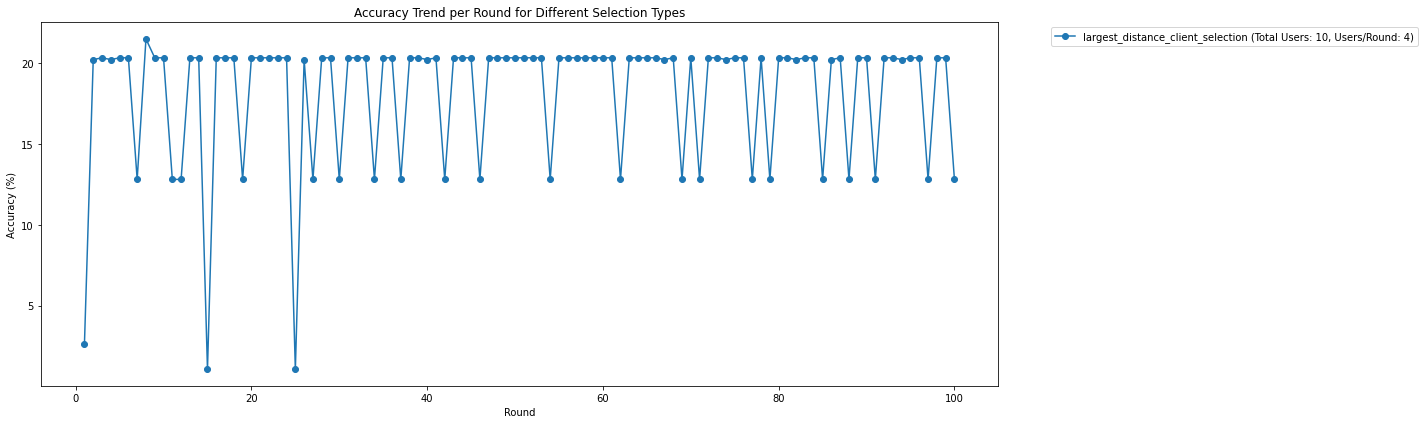

In [489]:
#======================================plot largest_distance_client_selection for raw data=========================================
#==================================================================================================================================


import matplotlib.pyplot as plt
import pandas as pd

# 读取数据文件
file_path = './eva_accuracy_per_round.txt'

# 初始化一个空的DataFrame来存储数据
df = pd.DataFrame(columns=['selection_type', 'total_user', 'user_per_round', 'accuracy', 'round'])

# 用于跟踪上一次的组合
last_combination = None
round_number = 1

with open(file_path, 'r') as file:
    for line in file:
        parts = line.strip().split(', ')
        selection_type = parts[0]
        total_user = int(parts[1].split(': ')[1])
        user_per_round = int(parts[2].split(': ')[1])
        accuracy = float(parts[3].split(': ')[1])
        
        # 当前组合
        current_combination = (selection_type, total_user, user_per_round)
        
        # 如果当前组合与上一组合不同，则重置round计数器
        if current_combination != last_combination:
            round_number = 1
            last_combination = current_combination
        else:
            round_number += 1

        # 添加新行到DataFrame
        df = pd.concat([df, pd.DataFrame({'selection_type': [selection_type], 'total_user': [total_user], 'user_per_round': [user_per_round], 'accuracy': [accuracy], 'round': [round_number]})], ignore_index=True)

# 绘图
plt.figure(figsize=(20, 6))

# 对每个独特的selection_type, total_user, user_per_round组合进行绘图
for (selection_type, total_user, user_per_round), group_df in df.groupby(['selection_type', 'total_user', 'user_per_round']):
    plt.plot(group_df['round'], group_df['accuracy'], marker='o', linestyle='-', label=f'{selection_type} (Total Users: {total_user}, Users/Round: {user_per_round})')

plt.title('Accuracy Trend per Round for Different Selection Types')
plt.xlabel('Round')
plt.ylabel('Accuracy (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


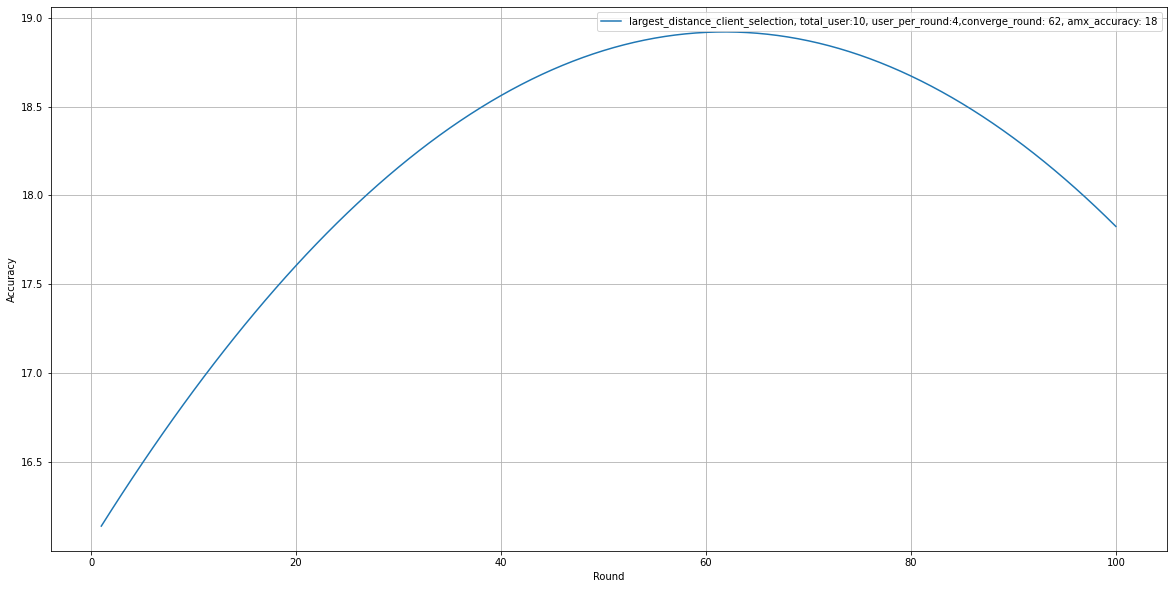

In [490]:
#=============================plot largest_distance_client_selection according to raw data to fitted ==============================
#=======================================================fitted curve===============================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 读取数据并解析
data = {}
with open("./eva_accuracy_per_round.txt", 'r') as file:
    for line in file:
        parts = line.strip().split(', ')
        selection_type = parts[0]
        total_user = int(parts[1].split(': ')[1])
        user_per_round = int(parts[2].split(': ')[1])
        accuracy = float(parts[3].split(': ')[1])
        
        # 根据不同的参数组合构建唯一的类型
        type_name = f"{selection_type}, total_user:{total_user}, user_per_round:{user_per_round}"
        data.setdefault(type_name, [])
        data[type_name].append((accuracy))

# 定义拟合函数
def polynomial(x, a, b, c):
    return a * x**2 + b * x + c

# 绘制每种类型的拟合后趋势
plt.figure(figsize=(20, 10))

max_accuracy_info = {}  # 用于存储每种类型拟合曲线的最大值信息

for type_name, accuracies in data.items():
    rounds = range(1, len(accuracies) + 1)
    
    # 将rounds转换为numpy数组
    rounds = np.array(rounds)
    accuracies = np.array(accuracies)
    
    # 执行曲线拟合
    popt, _ = curve_fit(polynomial, rounds, accuracies)
    
    # 生成拟合曲线的y值
    fitted_curve = polynomial(rounds, *popt)
    
    # 记录最大值信息
    max_accuracy = np.max(fitted_curve)
    max_round = np.argmax(fitted_curve) + 1  # +1 是因为round从1开始
    max_accuracy_info[type_name] = (max_round, max_accuracy)
    
    # 绘制拟合后的曲线
    plt.plot(rounds, fitted_curve, label=f'{type_name},converge_round: {int(max_accuracy_info[type_name][0])}, amx_accuracy: {int(max_accuracy_info[type_name][1])}')

plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.show()



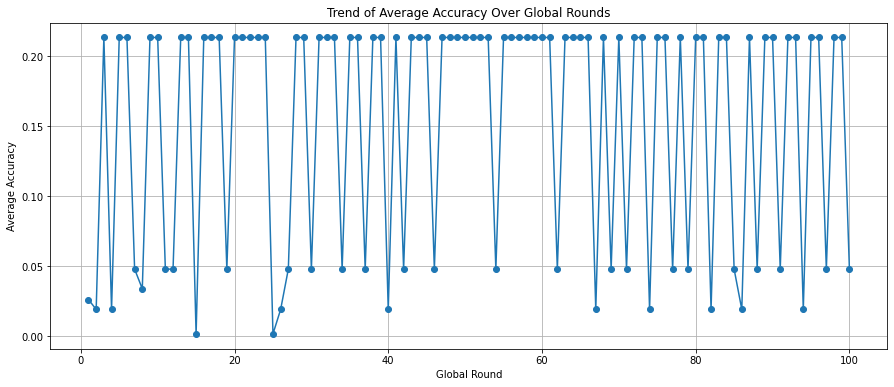

In [491]:
#plot accuracy based on local average

import matplotlib.pyplot as plt

# Read the data from the file
file_path = "./eva_accuracy_for_each_local_client.txt"
with open(file_path, "r") as file:
    lines = file.readlines()

# Parse the data and calculate average accuracy for each global round
global_rounds = {}
for line in lines:
    parts = line.strip().split(", ")
    global_round = int(parts[0].split(": ")[1])
    accuracy = float(parts[2].split(": ")[1])
    
    if global_round not in global_rounds:
        global_rounds[global_round] = []
    global_rounds[global_round].append(accuracy)

# Calculate average accuracy for each global round
average_accuracies = {}
for global_round, accuracies in global_rounds.items():
    average_accuracies[global_round] = sum(accuracies) / len(accuracies)

plt.figure(figsize=(15, 6))

# Plot the trend of average accuracy over global rounds
plt.plot(list(average_accuracies.keys()), list(average_accuracies.values()), marker='o')
plt.xlabel('Global Round')
plt.ylabel('Average Accuracy')
plt.title('Trend of Average Accuracy Over Global Rounds')
plt.grid(True)
plt.show()


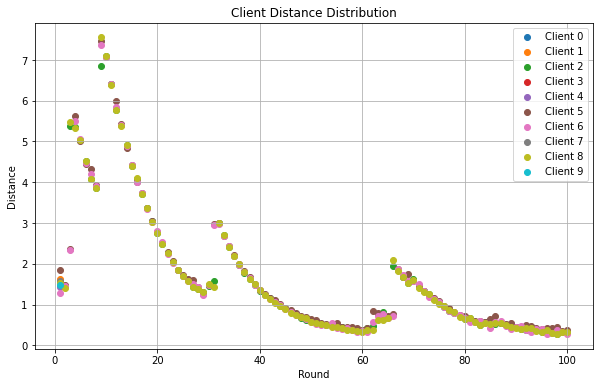

In [492]:
# plot largest_distance_selection distribution

import matplotlib.pyplot as plt
import numpy as np

# Read the data from the file
file_path = "./largest_client_selection_distance_values.txt"
with open(file_path, "r") as file:
    lines = file.readlines()

# Parse the data and extract round and norm values for each client
client_norms = {}
for line in lines:
    parts = line.strip().split(", ")
    round_val = int(parts[0].split(": ")[1])
    client_id = int(parts[1].split(": ")[1])
    norm = float(parts[2].split(": ")[1])
    if client_id not in client_norms:
        client_norms[client_id] = {"rounds": [], "norm_values": []}
    client_norms[client_id]["rounds"].append(round_val)
    client_norms[client_id]["norm_values"].append(norm)

plt.figure(figsize=(10, 6)) 
# Plot the scatter plot with different colors for different clients
for client_id, data in client_norms.items():
    plt.scatter(data["rounds"], data["norm_values"], label=f'Client {client_id}')


plt.xlabel('Round')
plt.ylabel('Distance')
plt.title('Client Distance Distribution')
plt.legend()
plt.grid(True)
plt.show()
